In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emitten-list/Emittenlist.csv
/kaggle/input/pertambangan/pertambangan.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# **1. Exploratory Data Analysis**

# **1.1 Load Data**

In [3]:
df0 = pd.read_csv('../input/pertambangan/pertambangan.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  38 non-null     object 
 1   DER                      38 non-null     float64
 2   Operating Profit Margin  38 non-null     float64
 3   Return On Asset          38 non-null     float64
 4   Sales Growth             38 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,38.000000,38.000000,38.000000,38.000000,0.0
mean,0.090254,77.623896,0.027221,0.308828,NaN
std,6.235241,209.671168,0.248929,0.482354,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.312500,-1.883337,-0.020000,0.000000,NaN
50%,0.650000,3.588500,0.010000,0.170151,NaN
75%,1.465000,41.302500,0.095000,0.660500,NaN
max,12.220000,744.890000,0.460000,1.426756,NaN


# **1.2 Data Cleansing**

In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

# **1.3 Scatter Plot**

<Figure size 1080x1080 with 0 Axes>

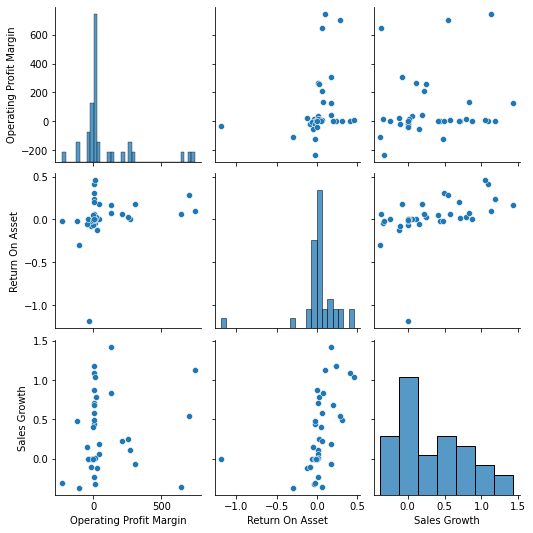

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# **2. Clustering**

# **2.1 Load Data**

In [7]:
df0 = pd.read_csv('../input/pertambangan/pertambangan.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Return On Asset','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,38.000000,38.000000,38.000000,38.000000,0.0
mean,0.090254,77.623896,0.027221,0.308828,NaN
std,6.235241,209.671168,0.248929,0.482354,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.312500,-1.883337,-0.020000,0.000000,NaN
50%,0.650000,3.588500,0.010000,0.170151,NaN
75%,1.465000,41.302500,0.095000,0.660500,NaN
max,12.220000,744.890000,0.460000,1.426756,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

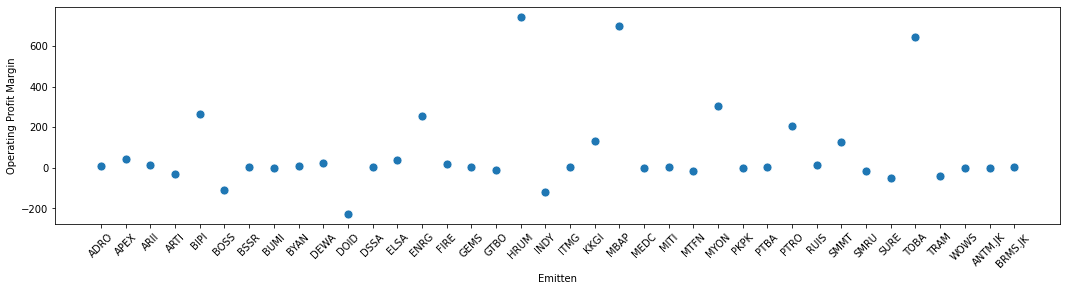

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

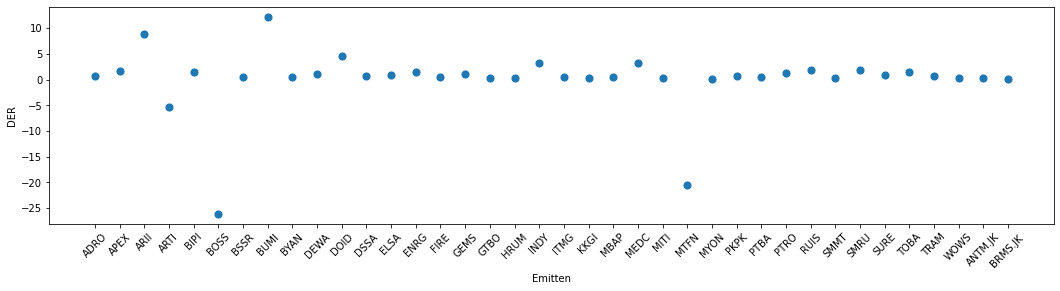

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

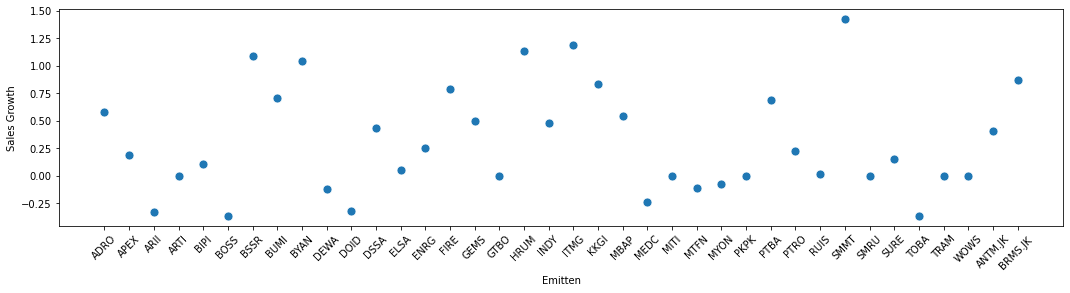

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

# **2.2 Outlier**

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 38
Jumlah baris setelah memfilter outlier: 36


In [12]:
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,36.000000,36.000000,36.000000,36.000000,0.0
mean,0.072213,41.808557,0.017900,0.279595,NaN
std,6.410371,146.207308,0.251581,0.473585,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.317500,-4.290000,-0.020000,0.000000,NaN
50%,0.695000,3.076000,0.010000,0.129090,NaN
75%,1.485000,27.870000,0.065000,0.603590,NaN
max,12.220000,643.740000,0.460000,1.426756,NaN


# **2.3 Standardisasi Fitur**

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,3.600000e+01,3.600000e+01,3.600000e+01
mean,-3.772421e-17,-1.387779e-17,9.868649e-17
std,1.014185e+00,1.014185e+00,1.014185e+00
min,-4.164439e+00,-1.889665e+00,-1.394917e+00
25%,3.880688e-02,-3.197684e-01,-5.987550e-01
50%,9.853117e-02,-2.686732e-01,-3.223086e-01
75%,2.235171e-01,-9.668653e-02,6.938378e-01
max,1.921902e+00,4.175372e+00,2.456651e+00


# **2.4 Lakukan K-means**

In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(38, 6)

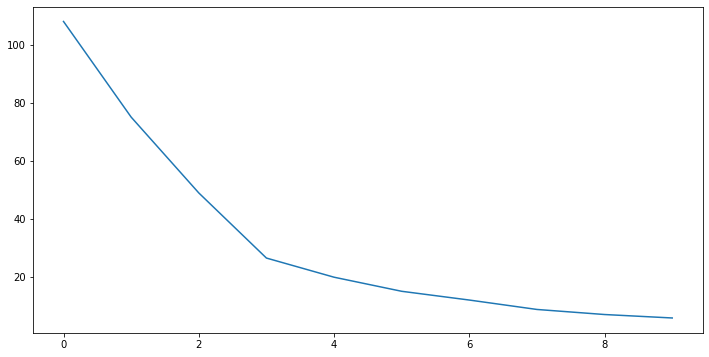

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 3 cluster (n_cluster = 3)

# **2.5 Pilih Jumlah Cluster**

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=3, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

# **2.6 Plot Cluster**

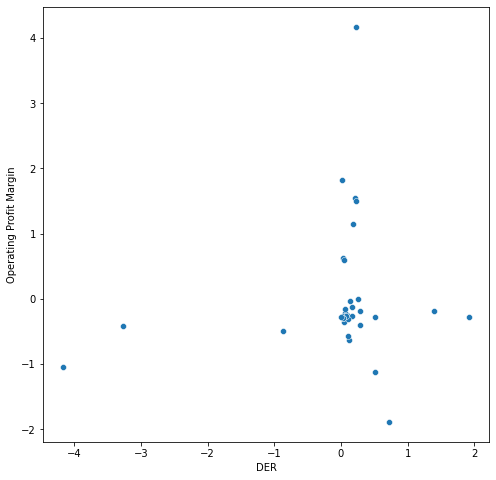

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.091412,-0.243792,0.632902,NaN,0
1,0.255950,0.005143,-0.192570,NaN,2
2,1.402973,-0.185406,-1.302656,NaN,2
3,-0.870505,-0.498595,-0.598755,NaN,2
4,0.213233,1.554438,-0.368436,NaN,2


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(6)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,0.091412,-0.243792,0.632902,NaN,0
1,1,0.255950,0.005143,-0.192570,NaN,2
2,1,1.402973,-0.185406,-1.302656,NaN,2
3,1,-0.870505,-0.498595,-0.598755,NaN,2
4,1,0.213233,1.554438,-0.368436,NaN,2
5,4,-4.164439,-1.046102,-1.394917,NaN,1


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       36 non-null     int64  
 1   DER (St.)                      36 non-null     float64
 2   Operating Profit Margin (St.)  36 non-null     float64
 3   Sales Growth (St.)             36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


# **2.6.1 3D Scatter Plot**

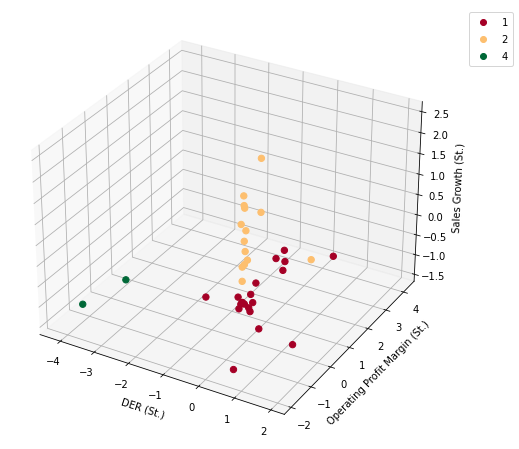

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# **2.6.2 X vs Z View**

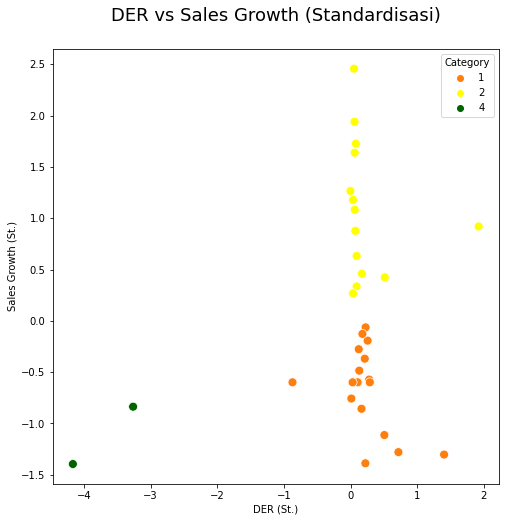

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()


# **2.6.3 Y vs Z View**

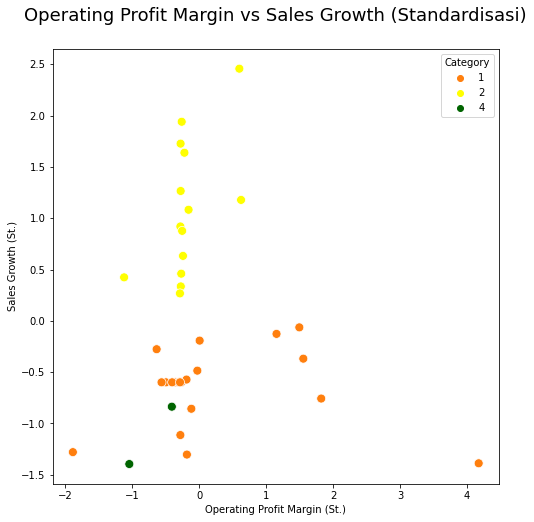

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **2.6.4 X vs Y View**

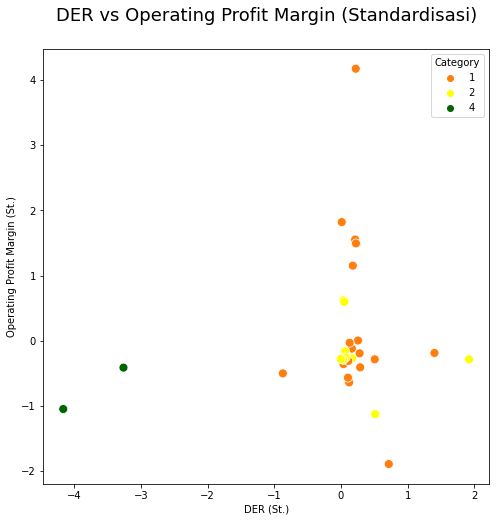

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()


# **3. Export Result**

Adjust **Initial Data** df0:


Delete outlier YELO and other column other than Emiten, DER,Operating Profit Margin,Sales Growth

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/emitten-list/Emittenlist.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(10)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return On Asset,Sales Growth
0,Oil Gas & Coal Equipment & Services,Adaro Energy Indonesia Tbk,2.0,0.091412,-0.243792,0.632902,ADRO,0.65,6.663,0.060000,0.575136
1,Oil Gas & Coal Equipment & Services,Apexindo Pratama Duta Tbk,1.0,0.255950,0.005143,-0.192570,APEX,1.69,42.550,0.180000,0.189673
2,Oil Gas & Coal Equipment & Services,Atlas Resources Tbk,1.0,1.402973,-0.185406,-1.302656,ARII,8.94,15.080,-0.038650,-0.328694
3,Oil Gas & Coal Equipment & Services,Ratu Prabu Energi Tbk,1.0,-0.870505,-0.498595,-0.598755,ARTI,-5.43,-30.070,-1.190000,0.000000
4,Oil Gas & Coal Equipment & Services,Astrindo Nusantara Infrastruktur Tbk,1.0,0.213233,1.554438,-0.368436,BIPI,1.42,265.900,0.010000,0.107550
5,Oil Gas & Coal Equipment & Services,Borneo Olah Sarana Sukses Tbk,4.0,-4.164439,-1.046102,-1.394917,BOSS,-26.25,-109.000,-0.300000,-0.371777
6,Oil Gas & Coal Equipment & Services,Baramulti Suksessarana Tbk,2.0,0.080337,-0.279709,1.726527,BSSR,0.58,1.485,0.410000,1.085816
7,Oil Gas & Coal Equipment & Services,Bumi Resources Tbk,2.0,1.921902,-0.282935,0.919573,BUMI,12.22,1.020,0.020000,0.709000
8,Oil Gas & Coal Equipment & Services,Bayan Resources Tbk,2.0,0.062934,-0.222448,1.637913,BYAN,0.47,9.740,0.460000,1.044437
9,Oil Gas & Coal Equipment & Services,Darma Henwa Tbk,1.0,0.164188,-0.119092,-0.856322,DEWA,1.11,24.640,-0.120227,-0.120274


In [29]:
df.to_csv('result.csv', index = False)

# **4. Get Centroid**

In [30]:
kmeans.cluster_centers_

array([[ 0.2323279 , -0.19463064,  1.08587606],
       [-3.71274898, -0.72837018, -1.11559467],
       [ 0.20864537,  0.20907847, -0.64855377]])

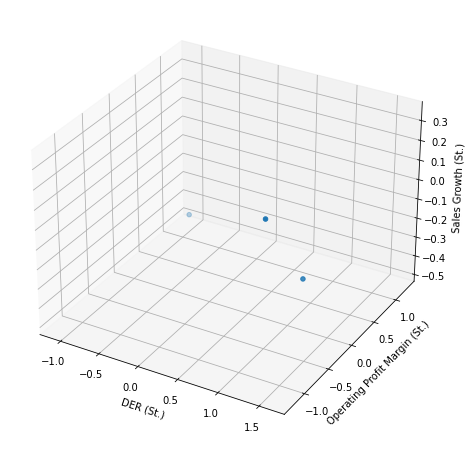

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-1.0747699 ,  1.60761561,  1.45000206]
y = [ 1.25270712, -0.73415244, -1.22811141]
z = [-0.47688144, -0.04643691,  0.33540692]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# **5. Cluster Description**

In [32]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,4.0,-3.712749,-0.728370,-1.115595,-11.485000,-53.997000,-0.145000,-0.305828
std,0.0,0.638786,0.449341,0.395022,20.880863,77.785989,0.219203,0.093265
min,4.0,-4.164439,-1.046102,-1.394917,-26.250000,-109.000000,-0.300000,-0.371777
25%,4.0,-3.938594,-0.887236,-1.255256,-18.867500,-81.498500,-0.222500,-0.338802
50%,4.0,-3.712749,-0.728370,-1.115595,-11.485000,-53.997000,-0.145000,-0.305828
75%,4.0,-3.486904,-0.569504,-0.975933,-4.102500,-26.495500,-0.067500,-0.272854
max,4.0,-3.261059,-0.410638,-0.836272,3.280000,1.006000,0.010000,-0.239880


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.0,0.232328,-0.194631,1.085876,1.616429,81.733786,0.130000,0.576380
std,0.0,0.502038,0.413165,0.662372,3.151292,217.308418,0.163754,0.435657
min,2.0,-0.001691,-1.123931,0.267560,0.150000,-120.220000,-0.020000,-0.073845
25%,2.0,0.053837,-0.279407,0.502901,0.455000,1.136250,0.005000,0.274287
50%,2.0,0.067680,-0.266603,1.000950,0.615000,3.374500,0.060000,0.534666
75%,2.0,0.091412,-0.227784,1.544755,1.047500,16.430000,0.225000,0.979577
max,2.0,1.921902,0.624167,2.456651,12.220000,744.890000,0.460000,1.185336


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.0,0.208645,0.209078,-0.648554,0.170000,95.584150,-0.027944,0.150142
std,0.0,0.405234,1.279664,0.379131,5.489839,224.021418,0.292605,0.432044
min,1.0,-0.870505,-1.889665,-1.387641,-20.540000,-230.610000,-1.190000,-0.368379
25%,1.0,0.089039,-0.368689,-0.781751,0.380000,-11.342500,-0.041488,-0.027728
50%,1.0,0.171308,-0.229315,-0.598755,0.875000,14.645000,0.005000,0.006262
75%,1.0,0.261883,0.292337,-0.456032,1.547500,129.000000,0.065000,0.204750
max,1.0,1.402973,4.175372,-0.063421,8.940000,699.710000,0.290000,1.426756


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
